In [3]:
treecover = gpd.read_file('/content/drive/MyDrive/Oregon_treeCover.shp')

In [4]:
# Filter density
treecover = treecover[treecover['label'] >= 1]

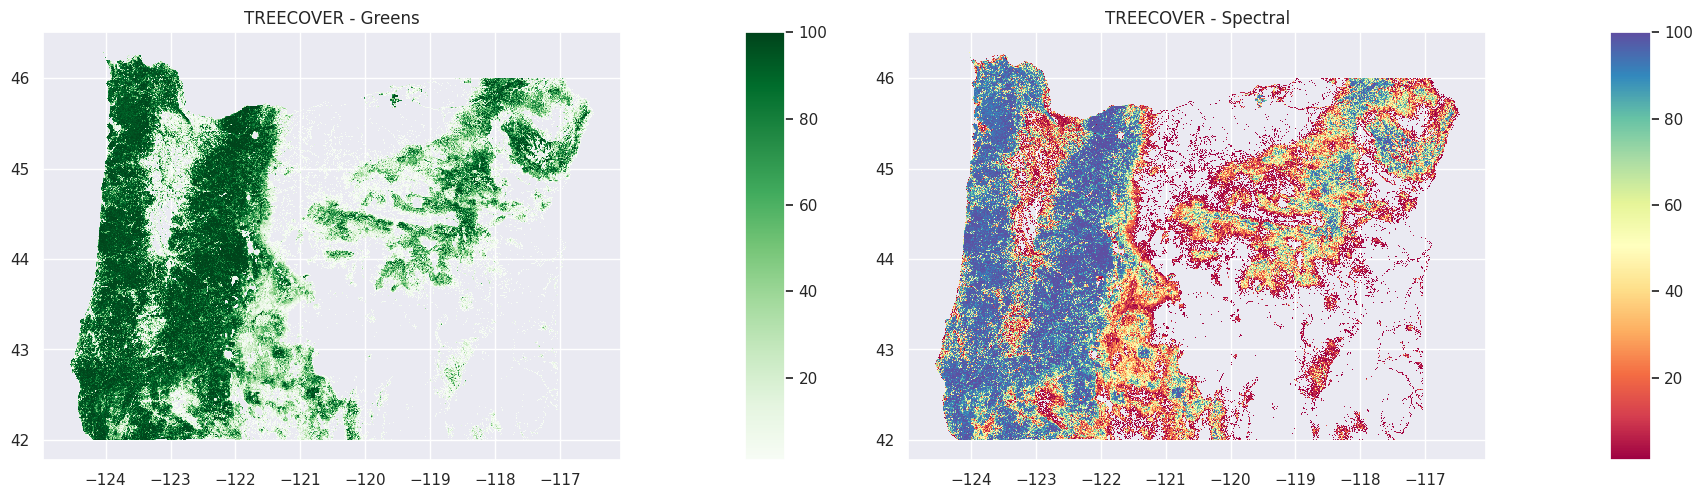

In [7]:
# subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# same hansen treecover dataset with 2 different colormaps side by side
plt.show()

In [9]:
# Filter density - get denser areas
treecover_50 = treecover[treecover['label'] >= 50]

In [10]:
treespecies = gpd.read_file('/content/drive/MyDrive/oregon_inventory.shp')

In [12]:
treespecies_50 = treespecies.clip(treecover_50)

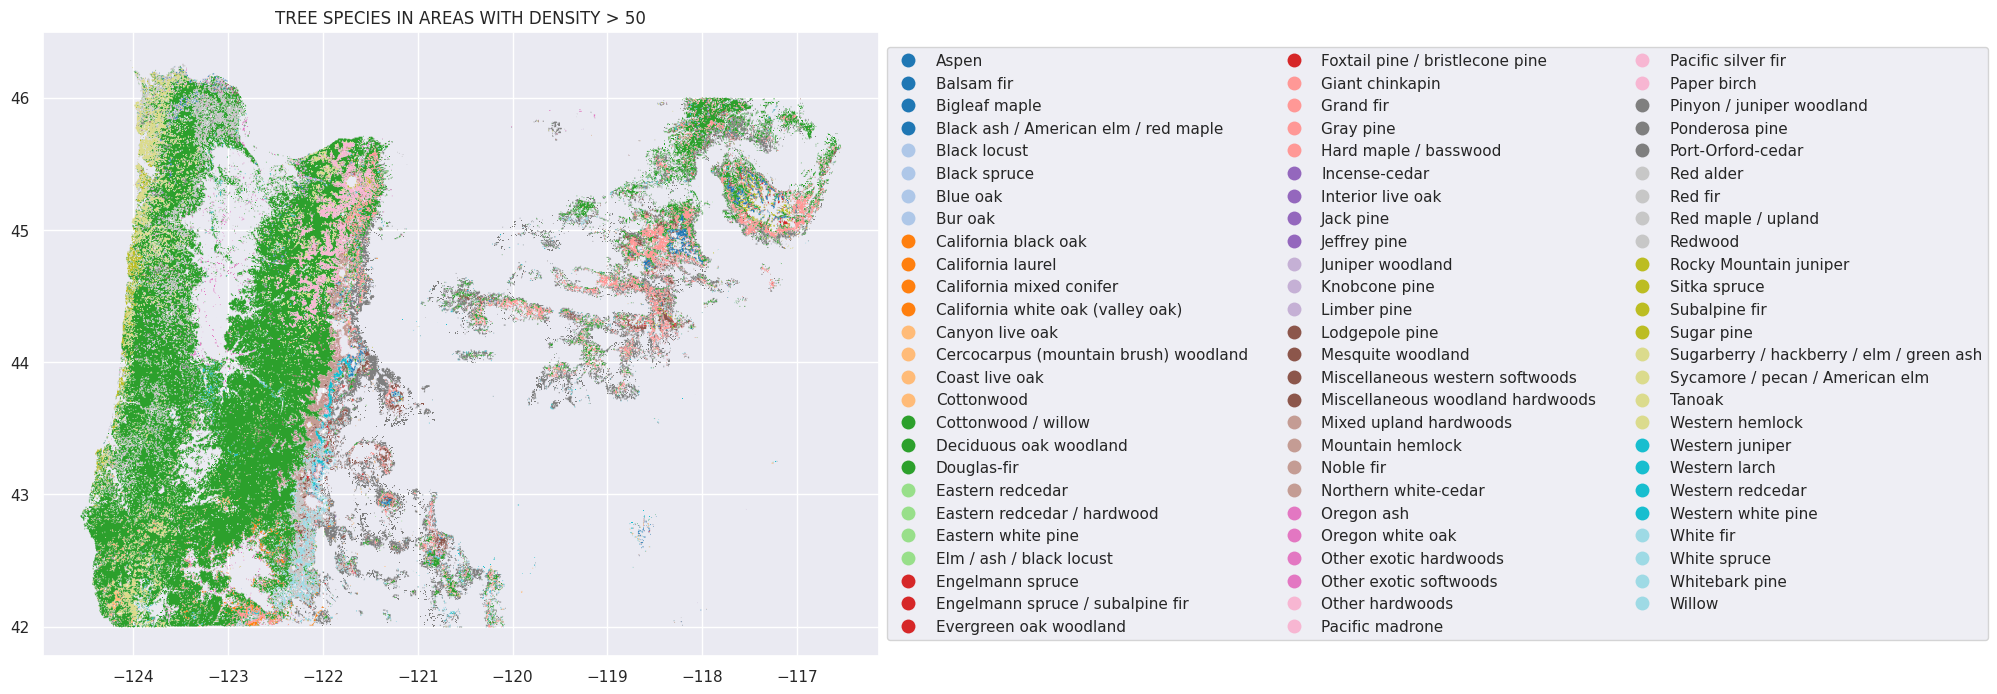

In [13]:
ax.set_title('TREE SPECIES IN AREAS WITH DENSITY > 50')
plt.show()

In [16]:
if 'area' not in treespecies_50.columns:
    treespecies_50['area'] = treespecies_50.geometry.area

In [17]:
species_area = treespecies_50.groupby('label')['area'].sum()

In [18]:
species_area = species_area.sort_values(ascending=False)

In [20]:
print(species_area)

label
Douglas-fir                                537483285003.76
Ponderosa pine                              96067017839.13
Grand fir                                   49351343306.76
Western hemlock                             36497879879.15
Red alder                                   35725655800.97
Lodgepole pine                              23793247659.53
Pacific silver fir                          23325963540.14
White fir                                   16530774298.23
Mountain hemlock                            15675270649.93
Tanoak                                      14882114704.56
Red fir                                     12318442632.23
Sitka spruce                                 8093089736.45
Oregon white oak                             5332820716.37
Canyon live oak                              5327862997.70
Balsam fir                                   5243148764.03
California mixed conifer                     5000425458.29
Port-Orford-cedar                            49896

**Forest carbon sequestration on the west
coast, USA: Role of species, productivity, and
stockability**

https://www.researchgate.net/journal/PLOS-ONE-1932-6203/publication/381042092_Forest_carbon_sequestration_on_the_west_coast_USA_Role_of_species_productivity_and_stockability/links/6662b24b85a4ee7261ab344b/Forest-carbon-sequestration-on-the-west-coast-USA-Role-of-species-productivity-and-stockability.pdf?_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6InB1YmxpY2F0aW9uIiwicGFnZSI6InB1YmxpY2F0aW9uIn19

In [22]:
def growth_curve(age, A, k, p):
    return A * (1 - np.exp(-k * age))**p

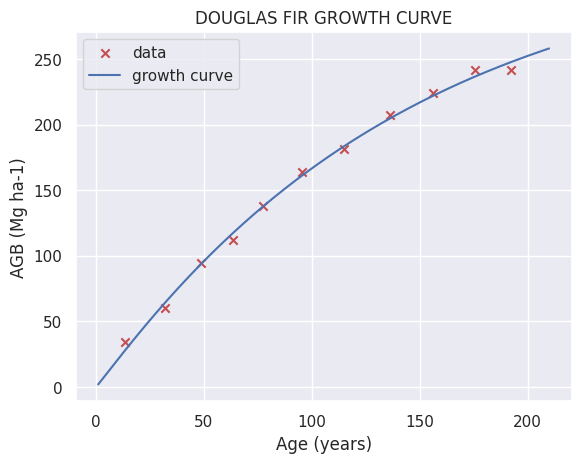

Parameters: ['336.0001261945', '0.0071136092', '1.0392222441']


In [24]:
douglas_fir = TreeSpecies('douglas fir',
                         [13.63636364, 31.81818182, 48.48484848, 63.63636364, 77.27272727, 95.45454545, 115.1515152, 136.3636364, 156.0606061, 175.7575758, 192.4242424],
                         [34.48275862, 60.34482759, 94.82758621, 112.0689655, 137.9310345, 163.7931034, 181.0344828, 206.8965517, 224.137931, 241.3793103, 241.3793103],
                         [250, 0.017, 2])

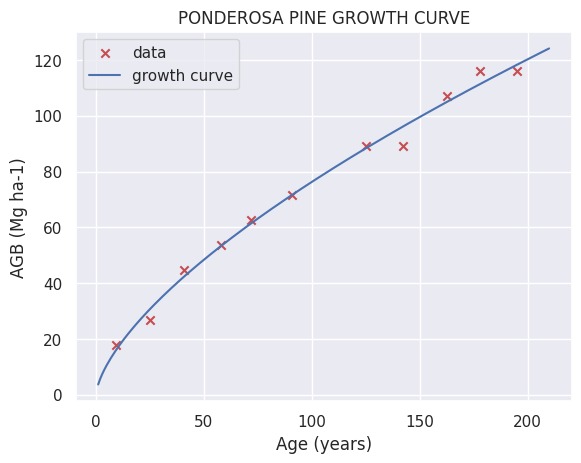

Parameters: ['9348.5259816123', '0.0000065879', '0.6564106807']


In [25]:
ponderosa_pine = TreeSpecies('ponderosa pine',
                         [9.375, 25, 40.625, 57.8125, 71.875, 90.625, 125, 142.1875, 162.5, 178.125, 195.3125],
                         [17.85714286, 26.78571429, 44.64285714, 53.57142857, 62.5, 71.42857143, 89.28571429, 89.28571429, 107.1428571, 116.0714286, 116.0714286],
                         [150, 0.007, 1])

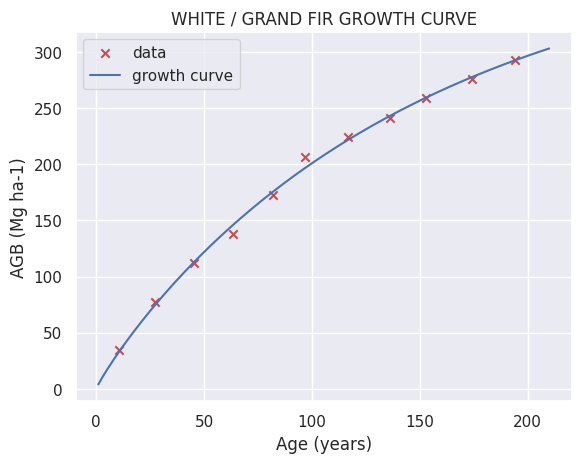

Parameters: ['402.1264483880', '0.0063016196', '0.9128595422']


In [26]:
white_grand_fir = TreeSpecies('white / grand fir',
                         [10.60606061, 27.27272727, 45.45454545, 63.63636364, 81.81818182, 96.96969697, 116.6666667, 136.3636364, 153.030303, 174.2424242, 193.9393939],
                         [34.48275862, 77.5862069, 112.0689655, 137.9310345, 172.4137931, 206.8965517, 224.137931, 241.3793103, 258.6206897, 275.862069, 293.1034483],
                         [350, 0.009, 1])

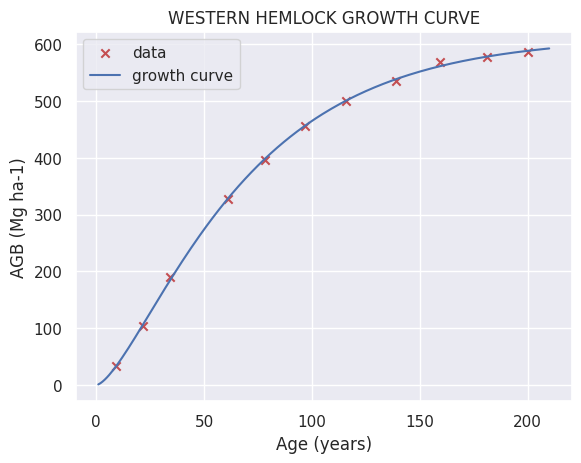

Parameters: ['613.6623444141', '0.0181465981', '1.5607250113']


In [27]:
western_hemlock = TreeSpecies('western hemlock',
                         [9.375, 21.875, 34.375, 60.9375, 78.125, 96.875, 115.625, 139.0625, 159.375, 181.25, 200],
                         [34.48275862, 103.4482759, 189.6551724, 327.5862069, 396.5517241, 456.8965517, 500, 534.4827586, 568.9655172, 577.5862069, 586.2068966],
                         [700, 0.009, 1])

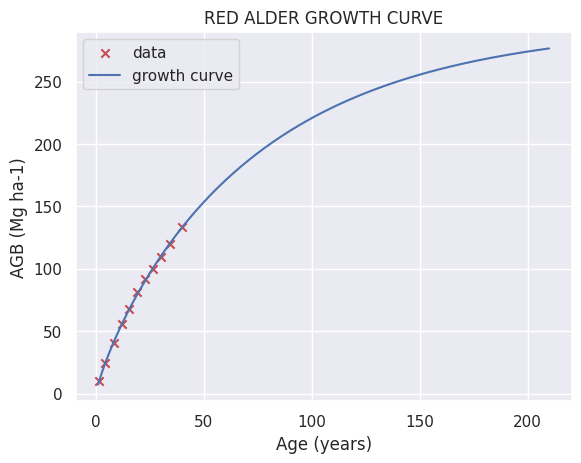

Parameters: ['295.6419484630', '0.0122161703', '0.8370540594']


In [28]:
red_alder = TreeSpecies('red alder',
                         [1.339285714, 4.196428571, 8.482142857, 12.14285714, 15.35714286, 19.19642857, 22.76785714, 26.51785714, 30.17857143, 34.10714286, 39.91071429],
                         [10.46511628, 24.41860465, 40.69767442, 55.81395349, 67.44186047, 81.39534884, 91.86046512, 100, 109.3023256, 119.7674419, 133.7209302],
                         [190, 0.04, 1.42])

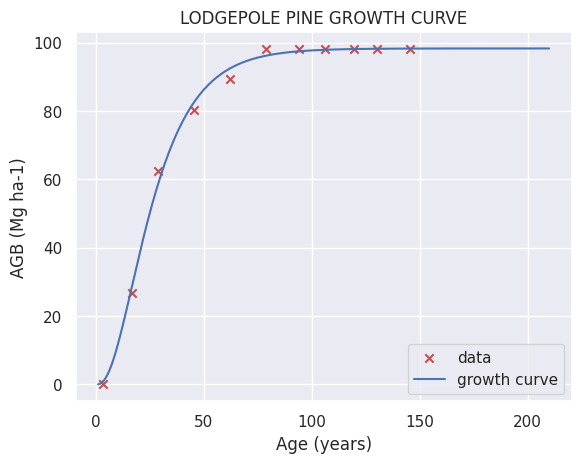

Parameters: ['98.2910650001', '0.0615601732', '2.7709486139']


In [29]:
lodgepole_pine = TreeSpecies('lodgepole pine',
                         [3.03030303, 16.66666667, 28.78787879, 45.45454545, 62.12121212, 78.78787879, 93.93939394, 106.0606061, 119.6969697, 130.3030303, 145.4545455],
                         [0, 26.78571429, 62.5, 80.35714286, 89.28571429, 98.21428571, 98.21428571, 98.21428571, 98.21428571, 98.21428571, 98.21428571],
                         [100, 0.03, 1])

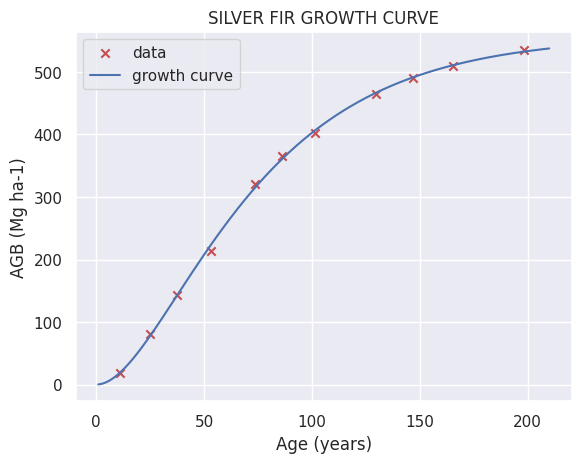

Parameters: ['558.0373652441', '0.0190884600', '2.0341741451']


In [30]:
silver_fir = TreeSpecies('silver fir',
                         [10.9375, 25, 37.5, 53.125, 73.4375, 85.9375, 101.5625, 129.6875, 146.875, 165.625, 198.4375],
                         [17.85714286, 80.35714286, 142.8571429, 214.2857143, 321.4285714, 366.0714286, 401.7857143, 464.2857143, 491.0714286, 508.9285714, 535.7142857],
                         [800, 0.006, 1])

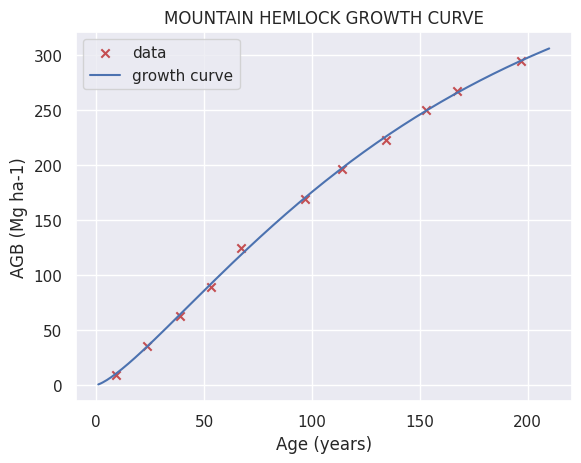

Parameters: ['418.9038209875', '0.0075621663', '1.3720609694']


In [31]:
mountain_hemlock = TreeSpecies('mountain hemlock',
                         [9.375, 23.4375, 39.0625, 53.125, 67.1875, 96.875, 114.0625, 134.375, 153.125, 167.1875, 196.875],
                         [8.928571429, 35.71428571, 62.5, 89.28571429, 125, 169.6428571, 196.4285714, 223.2142857, 250, 267.8571429, 294.6428571],
                         [370, 0.007, 1])

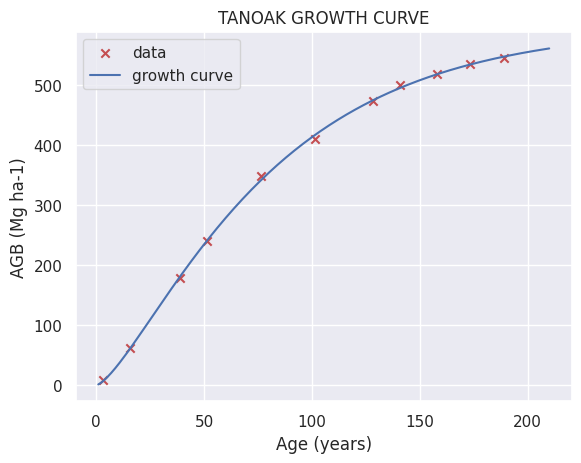

Parameters: ['598.3458965706', '0.0149722678', '1.4619679649']


In [32]:
tanoak = TreeSpecies('tanoak',
                         [3.125, 15.625, 39.0625, 51.5625, 76.5625, 101.5625, 128.125, 140.625, 157.8125, 173.4375, 189.0625],
                         [8.928571429, 62.5, 178.5714286, 241.0714286, 348.2142857, 410.7142857, 473.2142857, 500, 517.8571429, 535.7142857, 544.6428571],
                         [700, 0.008, 1])

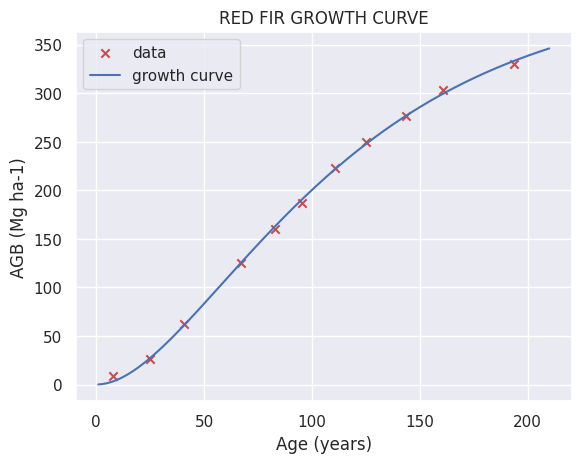

Parameters: ['407.6907507975', '0.0121720791', '2.0232057436']


In [33]:
red_fir = TreeSpecies('red fir',
                         [7.8125, 25, 40.625, 67.1875, 82.8125, 95.3125, 110.9375, 125, 143.75, 160.9375, 193.75],
                         [8.928571429, 26.78571429, 62.5, 125, 160.7142857, 187.5, 223.2142857, 250, 276.7857143, 303.5714286, 330.3571429],
                         [450, 0.006, 1])

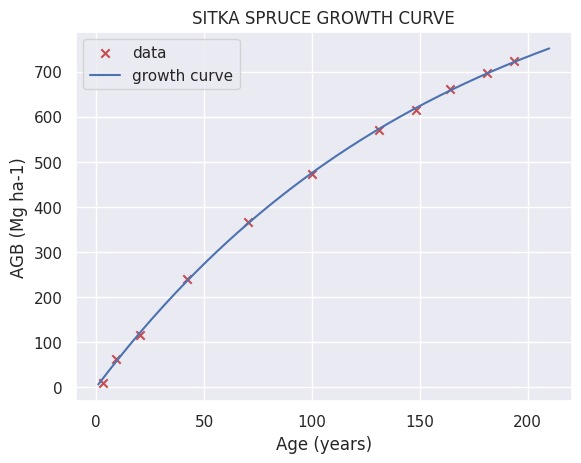

Parameters: ['1038.1333391789', '0.0061381027', '1.0021874316']


In [34]:
sitka_spruce = TreeSpecies('sitka spruce',
                         [3.125, 9.375, 20.3125, 42.1875, 70.3125, 100, 131.25, 148.4375, 164.0625, 181.25, 193.75],
                         [8.928571429, 62.5, 116.0714286, 241.0714286, 366.0714286, 473.2142857, 571.4285714, 616.0714286, 660.7142857, 696.4285714, 723.2142857],
                         [1050, 0.006, 1])